In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

file_path = "C:/Users/Cinzia/Desktop/python/ProjectWork/milk_quality_last.csv"
milk = pd.read_csv(file_path)

# #explore dataset
# print(milk.info())
# print(milk.head(20))

# #check if Nan in the file  /controllo se ci sono dati nulli
# print(milk.isna().sum())

# #cancel null data from dataset
milk = milk.dropna()

# #double check if null data still exhist
# print(milk.isna().sum())

# #check duplicate
# print(milk.duplicated().sum())

#cancel duplicate
milk.drop_duplicates()

print(f'Dopo eliminazione delle nan e duplicates \n {milk.info()}')



<class 'pandas.core.frame.DataFrame'>
Index: 688 entries, 0 to 1107
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          688 non-null    float64
 1   Temprature  688 non-null    float64
 2   Taste       688 non-null    float64
 3   Odor        688 non-null    float64
 4   Fat         688 non-null    float64
 5   Turbidity   688 non-null    float64
 6   Colour      688 non-null    float64
 7   quality     688 non-null    object 
dtypes: float64(7), object(1)
memory usage: 48.4+ KB
Dopo eliminazione delle nan e duplicates 
 None


In [23]:
# 2. Analisi delle labels
#print(milk['quality'].value_counts()) +o- .unique()

#change numpy array to a python list to make a for cicle (attenzione alla coaerenza series/lista)
#controllare funzioni series di pandas lower/replace
quality_milk = milk['quality'].tolist()

for maiu in range(len(quality_milk)):
    quality_milk[maiu] = quality_milk[maiu].lower()

for underscore in range(len(quality_milk)):
    quality_milk[underscore] = quality_milk[underscore].replace('_', '')

#sostituisco i valori nella colonna
milk['quality'] = quality_milk

print(milk['quality'].value_counts())


quality
low       269
medium    247
high      172
Name: count, dtype: int64


In [24]:
# calcolo media, mediana e deviazione
# print(milk.describe())
# print(milk.columns)

#altro metodo per selezione delle statistiche da lezione 12
quality_columns = milk[['pH', 'Temprature', 'Taste', 'Fat ', 'Odor', 'Turbidity', 'Colour']]
print(type(quality_columns))
print(f'Describe:{quality_columns.describe()}')

statistiche = quality_columns.agg(['mean','min', 'max', 'std', 'median'])
print(f'statistiche: {statistiche}')


<class 'pandas.core.frame.DataFrame'>
Describe:               pH  Temprature       Taste        Fat         Odor   Turbidity  \
count  688.000000  688.000000  688.000000  688.000000  688.000000  688.000000   
mean     6.608576   44.101744    0.561047    0.672965    0.443314    0.476744   
std      1.389218    9.960831    0.496620    0.469471    0.497138    0.499822   
min      3.000000   34.000000    0.000000    0.000000    0.000000    0.000000   
25%      6.500000   38.000000    0.000000    0.000000    0.000000    0.000000   
50%      6.700000   41.000000    1.000000    1.000000    0.000000    0.000000   
75%      6.800000   45.000000    1.000000    1.000000    1.000000    1.000000   
max      9.500000   90.000000    1.000000    1.000000    1.000000    1.000000   

           Colour  
count  688.000000  
mean   251.792151  
std      4.303832  
min    240.000000  
25%    248.000000  
50%    255.000000  
75%    255.000000  
max    255.000000  
statistiche:               pH  Temprature  

In [25]:

# ciclo for per visualizzare le mediane.. questo commentato sotto è 
#sbagliato perchè cicla l'index e non rende i valori 

# for colonna in range(len(milk['quality_columns'])):
#     quality_columns[i] = quality_columns.median[i]

cols = ['pH', 'Temprature', 'Taste', 'Fat ', 'Turbidity', 'Colour']

for colonna in cols:
    res = quality_columns[colonna].median()
    print(f'mediana: {res}')



mediana: 6.7
mediana: 41.0
mediana: 1.0
mediana: 1.0
mediana: 0.0
mediana: 255.0


In [26]:
# 4. Preprocessing dataset
# 1. Normalizzazione (se necessaria)
# 2. Conversione stringhe->numero

#check if this cols are already normalized as seems 1.0
print(milk['Taste'].value_counts())
print(milk['Turbidity'].value_counts())
print(milk['Fat '].value_counts())
print(milk['Odor'].value_counts())


Taste
1.0    386
0.0    302
Name: count, dtype: int64
Turbidity
0.0    360
1.0    328
Name: count, dtype: int64
Fat 
1.0    463
0.0    225
Name: count, dtype: int64
Odor
0.0    383
1.0    305
Name: count, dtype: int64


In [42]:
# 5. Preparazione dei dati
# 1. Dividere features dalle labels
# 2. Split del dataset in training set e test set

normalizer = MinMaxScaler()
label_encoder = LabelEncoder()

cols_to_normalize = ['pH', 'Temprature', 'Colour']

#applico min max scaler alla selezione di colonne, ricordarsi la doppia quadra
for colonna in cols_to_normalize:
    milk[colonna] = normalizer.fit_transform(milk[[colonna]])

print(milk.head())

#applico la label alla quality
label_encoder.fit(milk[['quality']])
milk['quality'] = label_encoder.transform(milk[['quality']])

display(milk.head(20))

#save DataFrame to pickle file for a quick reading
milk.to_pickle("preprocessed_milk.pkl")

         pH  Temprature  Taste  Odor  Fat   Turbidity    Colour  quality
0  0.553846    0.017857    1.0   0.0   1.0        0.0  0.933333        0
1  0.553846    0.035714    0.0   1.0   0.0        1.0  0.866667        0
2  0.846154    0.642857    1.0   1.0   1.0        1.0  0.400000        1
3  1.000000    0.000000    1.0   1.0   0.0        1.0  1.000000        1
4  0.553846    0.053571    0.0   0.0   0.0        0.0  1.000000        2


C:\Users\Cinzia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Cinzia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,quality
0,0.553846,0.017857,1.0,0.0,1.0,0.0,0.933333,0
1,0.553846,0.035714,0.0,1.0,0.0,1.0,0.866667,0
2,0.846154,0.642857,1.0,1.0,1.0,1.0,0.400000,1
3,1.000000,0.000000,1.0,1.0,0.0,1.0,1.000000,1
4,0.553846,0.053571,0.0,0.0,0.0,0.0,1.000000,2
6,0.384615,0.196429,1.0,0.0,1.0,1.0,0.666667,1
9,0.569231,0.196429,1.0,1.0,0.0,0.0,0.466667,2
10,0.569231,0.196429,1.0,1.0,1.0,0.0,0.333333,2
11,0.400000,0.285714,0.0,1.0,1.0,1.0,1.000000,1
13,0.676923,1.000000,1.0,0.0,1.0,1.0,1.000000,1


In [28]:
# 6. Modello di Machine Learning
# 1. Scelta del modello da utilizzare - choosing model Decision Tree 

from sklearn.tree import DecisionTreeClassifier

# adding in the head --> from sklearn.model_selection import train_test_split
# adding here on top --> from sklearn.tree import DecisionTreeClassifier

#splitting dataset into train and test set 
#  giving "X" (capitol) to features and "y" to label
X = milk[['pH', 'Temprature', 'Taste', 'Fat ', 'Turbidity', 'Colour']]
y = milk['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

# 2. Creating model and learning on the taaining set -- Addestramento sul training set
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)

#printing learning status
print('Il modello è stato addestrato')

# 3. Predizioni sul test set delle features ******chiedere il significato*****
y_pred = model_dtc.predict(X_test)
print(X_test)

Il modello è stato addestrato
            pH  Temprature  Taste  Fat   Turbidity    Colour
472   0.569231    0.071429    1.0   1.0        0.0  1.000000
1048  1.000000    0.000000    1.0   0.0        1.0  1.000000
413   0.584615    0.196429    1.0   1.0        0.0  0.333333
547   0.538462    0.107143    1.0   0.0        0.0  0.666667
521   0.569231    0.196429    1.0   0.0        0.0  0.466667
...        ...         ...    ...   ...        ...       ...
543   1.000000    0.000000    1.0   0.0        1.0  1.000000
829   0.923077    0.160714    1.0   1.0        1.0  0.666667
41    0.000000    0.107143    1.0   0.0        0.0  1.000000
265   0.538462    0.035714    0.0   1.0        0.0  1.000000
844   0.584615    0.035714    0.0   1.0        0.0  0.866667

[138 rows x 6 columns]


In [43]:
# 7. Valutazione del modello

# import library for valutations metrics

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Calcolare l’accuratezza del modello tra le labels ed il test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy della predizione: {accuracy: .2f}')

print(f'Questa classification della singola predizione \n {classification_report(y_test, y_pred, digits=2)}')

Accuracy della predizione:  1.00
Questa classification della singola predizione 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        43

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



[[38  0  0]
 [ 0 57  0]
 [ 0  0 43]]


<Axes: >

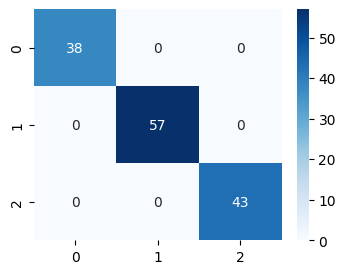

In [39]:
# Set up confuzione matrix
# (da wikipedia)
# detta anche tabella di errata classificazione, restituisce una rappresentazione dell'accuratezza di classificazione statistica
# Ogni colonna della matrice rappresenta i valori predetti, mentre ogni riga rappresenta i valori reali. 
# L'elemento sulla riga i e sulla colonna j è il numero di casi in cui il classificatore ha classificato 
# la classe "vera" i come classe j. 
# Attraverso questa matrice è osservabile se vi è "confusione" nella classificazione di diverse classi.

cm = confusion_matrix(y_test, y_pred)
print(cm)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,3))
sns.heatmap(cm, cmap='Blues', fmt="d", annot=True)

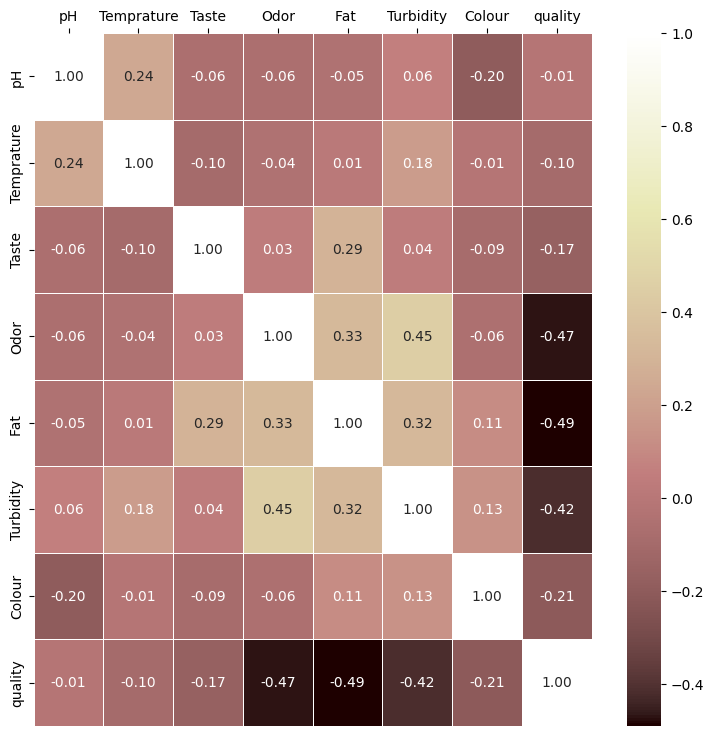

In [41]:
# plot a correlation matrix

corr_mtrx = milk.corr()

# defining custom correlation matrix colormap style using seaborn
f, ax = plt.subplots(figsize=(9, 9))
ax = sns.heatmap(corr_mtrx,annot=True, fmt='.2f', linewidth=.5, cmap="pink")
ax.set(xlabel='', ylabel='')
ax.xaxis.tick_top()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_dtc, X, y, cv=10)
print(scores.mean(), scores.std())

print(f'Decision Tree Classifier MODEL Accuracy is {round((cross_val_score(model_dtc,X,y,scoring="accuracy").mean())*100,2)}')


0.9912617220801364 0.018606760637965663
Decision Tree Classifier MODEL Accuracy is 99.13
Questo è il calssification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        43

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



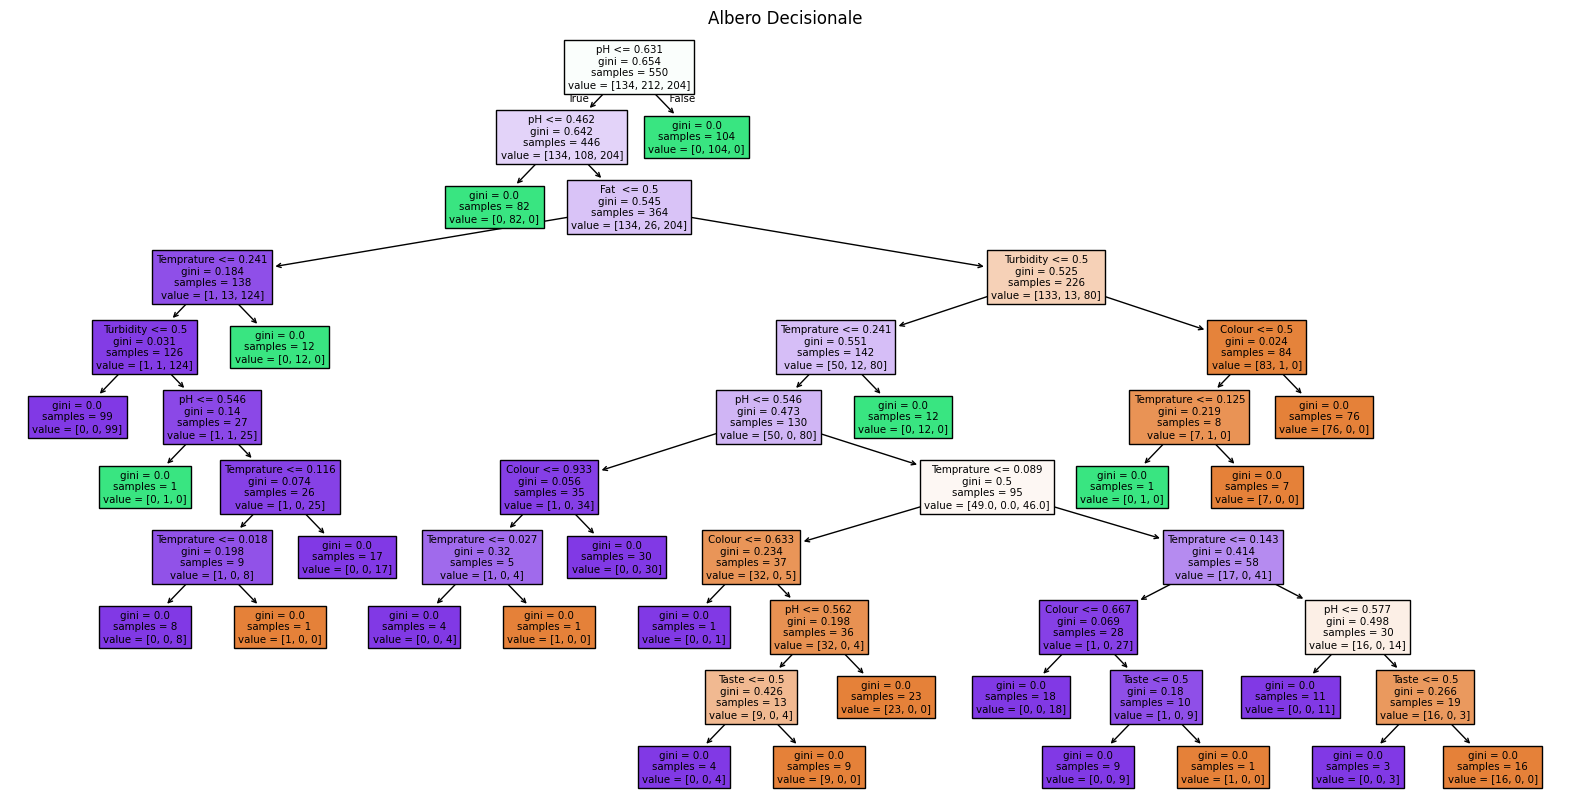

In [32]:
#plotto l'albero
from sklearn import tree

#metodo sklearn
# plt.figure(figsize=(12,9))
# tree.plot_tree(model_dtc)
# plt.show()

#metodo Luca
plt.figure(figsize=(20, 10))
tree.plot_tree(model_dtc, feature_names=X.columns, filled=True)
plt.title("Albero Decisionale")
plt.show()